In [1]:
# -*- encoding: utf-8 -*-
'''
@File : Fig2-10_Brazil_Hourly_Pos.ipynb
@AU.  : Gulin Ran 
@Mail : gulinr@whu.edu.cn 
@VER  : 1.0
@Time : 2023/04/15 20:53:13
@LIC  : Licensed under the MIT license
@Desc : None
'''


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER,LONGITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from pytesmo.time_series import anomaly as pyan
from collections import Counter
import sys
from matplotlib.lines import Line2D
from cartopy.io.shapereader import Reader, natural_earth
import numpy as np

from matplotlib.font_manager import FontProperties

cn_font = FontProperties(fname=r"c:\windows\fonts\SimHei.ttf", size=20)

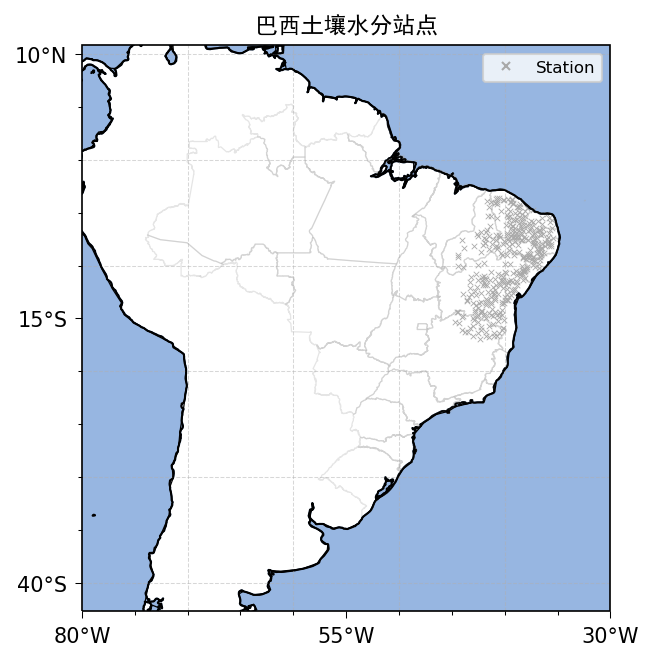

In [4]:

df2 = pd.read_csv(r'D:\independent_station\brazil_daily\brazil.csv')

fig = plt.figure(figsize=(10,5),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xticks([])
ax.set_yticks([])
# ax = plt.axes(projection=ccrs.Robinson())
# ax.set_extent([-130, -60, 19, 46])
ax.coastlines(resolution='50m',color='black')
# ax.set_global()
ax.set_extent([-30, -80, -40, 10])
ax.add_feature(cfeature.OCEAN, edgecolor='black',color = cfeature.COLORS['water'])
ax.set_yticks(np.arange(-40,11,25), crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
ax.set_xticks(np.arange(-80,-29,25), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
ax.tick_params(which='both', labelsize=10, width=0.5)
ax.minorticks_on()

shppp = r'I:\rgreen_soil_moisture_master_degree\plt_data\shp_file\bra_adm_ibge_2020_shp'
provinces = cfeature.ShapelyFeature(
    Reader(os.path.join( shppp,'bra_admbnda_adm1_ibge_2020.shp')).geometries(),
    ccrs.PlateCarree(), edgecolor='k',
    facecolor='none'
)
ax.add_feature(provinces, linewidth=0.6, zorder=2,edgecolor = 'darkgray',alpha=0.3)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6, zorder=10)
# ax.add_feature(cfeature.LAND.with_scale('50m'))
# ax.stock_img()

title = '巴西土壤水分站点'
ax.set_title(f'{title}', fontsize=11,fontproperties=cn_font)


ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=10)
ax.gridlines(draw_labels=False,
             crs=ccrs.PlateCarree(),
             linewidth=0.5,
             linestyle='--',
             alpha=0.5,)
dummy_scatter = Line2D([0], [0], linestyle='none', marker='x', color='#a9a9a9', markersize=7)
cs = plt.scatter(x=df2['longitude'].tolist(),
            y=df2['latitude'].tolist(),
            color = '#a9a9a9',
            # c=df2['Color'].tolist(),
            s=7,
            edgecolors='black',
            alpha=1,
            linewidths=0.4,
            transform=ccrs.PlateCarree(),
            marker='x',
            cmap='gnuplot2',)
# plt.legend([dummy_scatter], ['ISMN Network'], title='Legend')
plt.legend([dummy_scatter], ['Station'],loc='upper right',
           fontsize=8,
           markerscale=.5,
           frameon=True)

# # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m',
# #                                         edgecolor='face',
# #                                         facecolor=cfeature.COLORS['land']))
# # plt.legend(numpoints=1,ncol=6,loc=0,title='ISMN Network')

# plt.savefig(os.path.join(folder_output, 'statiob.pdf'), dpi=300)
# plt.savefig(os.path.join(folder_output, 'statiob.png'), dpi=300)
fig.savefig(os.path.join(r'D:\cn_plot', 'Brazil.jpg'), dpi=150)